In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz,DecisionTreeRegressor
from xgboost import XGBRegressor
from datetime import datetime

In [2]:
df=pd.read_excel('Train.xlsx',header=0,sep=',')

In [3]:
df2=pd.read_excel('Test.xlsx',header=0,sep=',')

In [4]:
df.shape,df2.shape

((16810, 19), (2936, 18))

In [5]:
df.YearOfConstruction.nunique()

72

In [6]:
df.dtypes

PropertyID                            object
Borough                                int64
State                                 object
Surroundings                          object
Address                               object
ZipCode                                int64
Block                                  int64
Lot                                    int64
BldgClassCategory                     object
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime              int64
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
dtype: object

In [7]:
df.describe(include='all')

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
count,16810,16810.000000,16810,16810,16810,16810.000000,16810.000000,16810.000000,16810,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,16810,16810,1.681000e+04
unique,16810,NaN,1,243,15219,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,572,NaN
top,PR15920,NaN,NY,FLUSHING-NORTH,102 WEST 57TH STREET,NaN,NaN,NaN,01 ONE FAMILY DWELLINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5,2014-06-28 00:00:00,NaN
freq,1,NaN,16810,801,102,NaN,NaN,NaN,4272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3454,82,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-30 00:00:00,NaN
mean,NaN,3.439143,NaN,NaN,NaN,10871.027543,5428.122308,266.327722,NaN,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,NaN,NaN,8.084101e+05
std,NaN,1.398950,NaN,NaN,NaN,522.996869,3710.031921,542.420132,NaN,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,NaN,NaN,8.978317e+05
min,NaN,1.000000,NaN,NaN,NaN,10001.000000,6.000000,1.000000,NaN,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,NaN,NaN,1.000440e+05
25%,NaN,2.000000,NaN,NaN,NaN,10312.000000,2401.250000,25.000000,NaN,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,NaN,NaN,4.250000e+05


In [8]:
df.drop(['PropertyID','State','Address'],axis=1,inplace=True)

In [9]:
df2.drop(['PropertyID','State','Address'],axis=1,inplace=True)

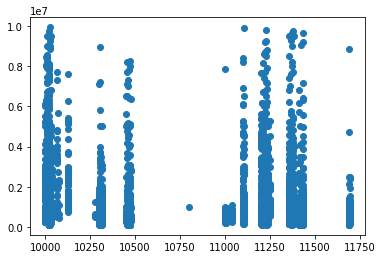

In [10]:
plt.scatter(df.ZipCode,df.PropertyEvaluationvalue)

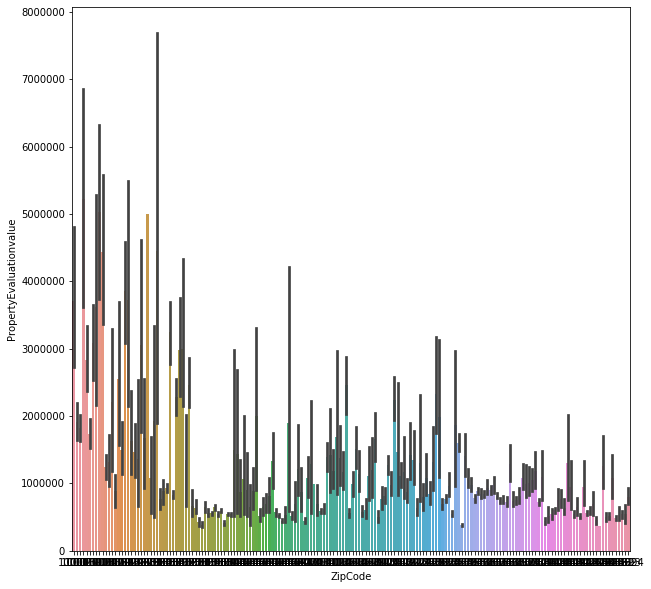

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(df.ZipCode,df.PropertyEvaluationvalue)

In [12]:
df['bldgclass']=df['BldgClassCategory'].str.extract('(\d+)')

In [13]:
df2['bldgclass']=df['BldgClassCategory'].str.extract('(\d+)')

In [14]:
df.drop(['BldgClassCategory'],axis=1,inplace=True)

In [15]:
df2.drop(['BldgClassCategory'],axis=1,inplace=True)

In [16]:
#sns.pairplot(df)

In [17]:
df.corr()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
Borough,1.000000,0.488406,0.313951,0.005866,-0.005122,-0.006849,-0.006620,0.002994,0.005231,-0.168352,0.003318,0.049743
ZipCode,0.488406,1.000000,0.528438,-0.125573,0.014876,-0.002288,0.013504,-0.046456,-0.090817,-0.261036,-0.044437,-0.012603
Block,0.313951,0.528438,1.000000,-0.240481,-0.008005,-0.024037,-0.013785,-0.046750,-0.083749,-0.269244,-0.234643,-0.186906
Lot,0.005866,-0.125573,-0.240481,1.000000,-0.025278,-0.000308,-0.024030,0.234273,-0.050164,0.339635,0.280392,0.207938
NoOfResidentialUnits,-0.005122,0.014876,-0.008005,-0.025278,1.000000,0.073065,0.966332,0.049807,0.467357,0.005098,0.038005,0.098409
NoOfCommercialUnits,-0.006849,-0.002288,-0.024037,-0.000308,0.073065,1.000000,0.327214,0.660527,0.604961,0.020689,0.219687,0.068230
TotalNoOfUnits,-0.006620,0.013504,-0.013785,-0.024030,0.966332,0.327214,1.000000,0.217598,0.598885,0.010168,0.092686,0.110843
LandAreaInSqFt,0.002994,-0.046456,-0.046750,0.234273,0.049807,0.660527,0.217598,1.000000,0.465828,0.018417,0.090533,0.034867
GrossAreaInSqFt,0.005231,-0.090817,-0.083749,-0.050164,0.467357,0.604961,0.598885,0.465828,1.000000,0.085072,0.328519,0.068621
YearOfConstruction,-0.168352,-0.261036,-0.269244,0.339635,0.005098,0.020689,0.010168,0.018417,0.085072,1.000000,0.210623,0.113079


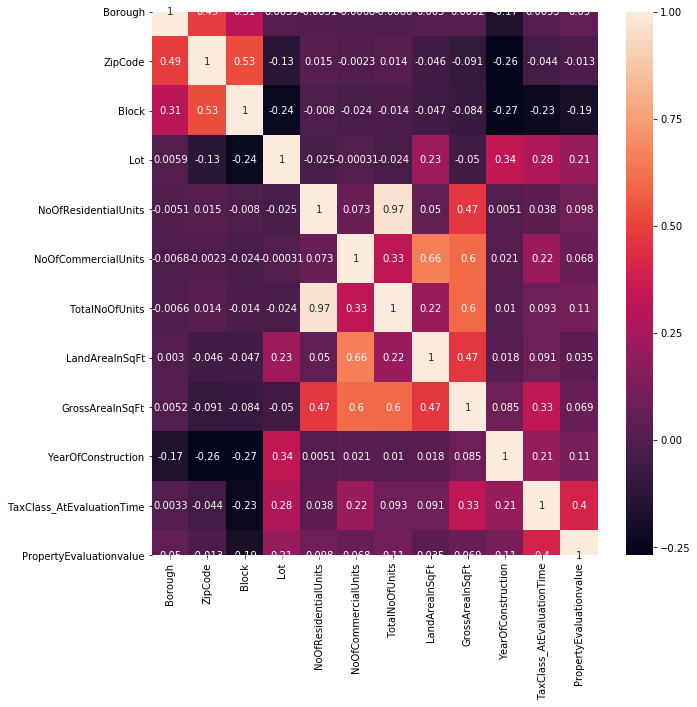

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

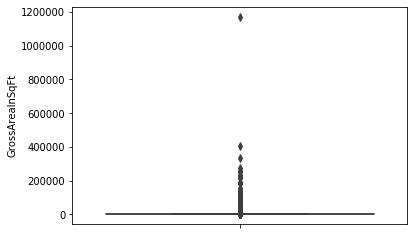

In [19]:
sns.boxplot(df.GrossAreaInSqFt,orient='v')

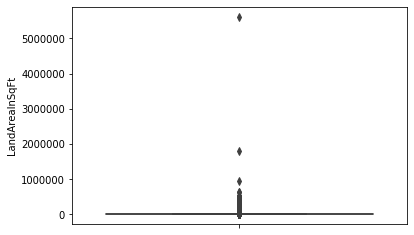

In [20]:
sns.boxplot(df.LandAreaInSqFt,orient='v')

In [21]:
df.dtypes

Borough                                int64
Surroundings                          object
ZipCode                                int64
Block                                  int64
Lot                                    int64
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime              int64
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
bldgclass                             object
dtype: object

In [22]:
df['DateOfEvaluation']=pd.to_datetime(df['DateOfEvaluation']) 
df2['DateOfEvaluation']=pd.to_datetime(df2['DateOfEvaluation']) 

In [23]:
#df['YearOfConstruction']=pd.to_datetime(df['YearOfConstruction']) 

In [24]:
df.dtypes

Borough                                int64
Surroundings                          object
ZipCode                                int64
Block                                  int64
Lot                                    int64
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime              int64
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
bldgclass                             object
dtype: object

In [25]:
df['YearOfEvaluation']= df['DateOfEvaluation'].dt.strftime("%Y")

In [26]:
df2['YearOfEvaluation']= df2['DateOfEvaluation'].dt.strftime("%Y")

In [27]:
df['YearOfEvaluation']= df['YearOfEvaluation'].astype('int64')
df2['YearOfEvaluation']= df2['YearOfEvaluation'].astype('int64')

In [28]:
df['age'] = df['YearOfEvaluation'] - df['YearOfConstruction']

In [29]:
df2['age'] = df2['YearOfEvaluation'] - df2['YearOfConstruction']

In [30]:
df.drop(['DateOfEvaluation','YearOfConstruction','YearOfEvaluation'],axis=1,inplace=True)

In [31]:
df2.drop(['DateOfEvaluation','YearOfConstruction','YearOfEvaluation'],axis=1,inplace=True)

In [32]:
df.shape,df2.shape

((16810, 15), (2936, 14))

In [33]:
df.head()

,Borough,Surroundings,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,bldgclass,age
0,1,BATHGATE,10456,2927,127,2,0,2,1900,2394,1,B1,540000,02,24
1,1,BATHGATE,10457,3037,110,3,0,3,1687,3037,1,C0,750000,03,12
2,1,BATHGATE,10457,2912,155,2,0,2,2000,2400,1,B1,470000,02,25
3,1,BATHGATE,10457,2929,134,2,0,2,2356,2394,1,B1,570000,02,23
4,1,BATHGATE,10457,3036,140,2,0,2,3346,2308,1,B1,640000,02,22


In [34]:
df.corr()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,PropertyEvaluationvalue,age
Borough,1.000000,0.488406,0.313951,0.005866,-0.005122,-0.006849,-0.006620,0.002994,0.005231,0.003318,0.049743,0.166982
ZipCode,0.488406,1.000000,0.528438,-0.125573,0.014876,-0.002288,0.013504,-0.046456,-0.090817,-0.044437,-0.012603,0.259218
Block,0.313951,0.528438,1.000000,-0.240481,-0.008005,-0.024037,-0.013785,-0.046750,-0.083749,-0.234643,-0.186906,0.267569
Lot,0.005866,-0.125573,-0.240481,1.000000,-0.025278,-0.000308,-0.024030,0.234273,-0.050164,0.280392,0.207938,-0.330723
NoOfResidentialUnits,-0.005122,0.014876,-0.008005,-0.025278,1.000000,0.073065,0.966332,0.049807,0.467357,0.038005,0.098409,-0.006207
NoOfCommercialUnits,-0.006849,-0.002288,-0.024037,-0.000308,0.073065,1.000000,0.327214,0.660527,0.604961,0.219687,0.068230,-0.020932
TotalNoOfUnits,-0.006620,0.013504,-0.013785,-0.024030,0.966332,0.327214,1.000000,0.217598,0.598885,0.092686,0.110843,-0.011281
LandAreaInSqFt,0.002994,-0.046456,-0.046750,0.234273,0.049807,0.660527,0.217598,1.000000,0.465828,0.090533,0.034867,-0.016266
GrossAreaInSqFt,0.005231,-0.090817,-0.083749,-0.050164,0.467357,0.604961,0.598885,0.465828,1.000000,0.328519,0.068621,-0.088478
TaxClass_AtEvaluationTime,0.003318,-0.044437,-0.234643,0.280392,0.038005,0.219687,0.092686,0.090533,0.328519,1.000000,0.402181,-0.209335


In [35]:
df.drop(['ZipCode'],axis=1,inplace=True)
df2.drop(['ZipCode'],axis=1,inplace=True)

In [36]:
df.shape,df2.shape

((16810, 14), (2936, 13))

In [37]:
df.Lot[(df.Lot>0)&(df.Lot<=1000)]=1
df.Lot[(df.Lot>=1001)&(df.Lot<=2000)]=2
df.Lot[(df.Lot>2001)]=3

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [38]:
df2.Lot[(df2.Lot>0)&(df2.Lot<=1000)]=1
df2.Lot[(df2.Lot>=1001)&(df2.Lot<=2000)]=2
df2.Lot[(df2.Lot>2001)]=3

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [39]:
df.drop(['Block'],axis=1,inplace=True)

In [40]:
df2.drop(['Block'],axis=1,inplace=True)

In [41]:
x = df.copy().drop("PropertyEvaluationvalue",axis=1)
y = df["PropertyEvaluationvalue"]

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, random_state = 200)

In [43]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((13448, 12), (3362, 12), (13448,), (3362,))

In [50]:
for cols in ["Surroundings","BldgClass_AtEvaluationTime","bldgclass","Lot"]:
    x_train[cols] = x_train[cols].astype('category')

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
for cols in ["Surroundings","BldgClass_AtEvaluationTime","bldgclass","Lot"]:
    x_val[cols] = x_val[cols].astype('category')

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
for cols in ["Surroundings","BldgClass_AtEvaluationTime","bldgclass","Lot"]:
    df2[cols] = df2[cols].astype('category')

In [53]:
x_train.dtypes

Borough                          int64
Surroundings                  category
Lot                           category
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
TotalNoOfUnits                   int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
TaxClass_AtEvaluationTime        int64
BldgClass_AtEvaluationTime    category
bldgclass                     category
age                              int64
dtype: object

In [48]:
x_train.head()

,Borough,Surroundings,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,bldgclass,age
4487,5,SUNNYSIDE,1,2,0,2,1440,1740,1,B3,02,63
11394,4,LOWER EAST SIDE,1,0,1,1,2128,5850,4,K9,22,41
3776,3,WILLOWBROOK,1,2,0,2,4400,2528,1,B1,02,53
10592,5,REGO PARK,2,1,0,1,10000,633,2,R4,13,2
11225,4,UPPER WEST SIDE (59-79),3,1,0,1,72099,2457,2,R4,13,4


In [55]:
for i in ['Surroundings','BldgClass_AtEvaluationTime','bldgclass']:
    x_train[i]=x_train[i].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
for i in ['Surroundings','BldgClass_AtEvaluationTime','bldgclass']:
    x_val[i]=x_val[i].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
for i in ['Surroundings','BldgClass_AtEvaluationTime','bldgclass']:
    df2[i]=df2[i].cat.codes

In [60]:
x_train=pd.get_dummies(x_train,prefix=['Lot'])

In [66]:
x_val.head()

,Borough,Surroundings,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,bldgclass,age,Lot_1,Lot_2,Lot_3
8717,5,97,1,0,1,11138,3020,1,2,0,68,1,0,0
5992,3,217,2,0,2,6174,3520,1,9,1,1,1,0,0
13059,1,10,2,0,2,2106,1890,1,10,1,68,1,0,0
2373,5,186,1,0,1,3432,960,1,2,0,69,1,0,0
2454,5,186,0,1,1,10600,1785,4,37,18,47,1,0,0


In [64]:
x_val=pd.get_dummies(x_val,prefix=['Lot'])

ValueError: Length of 'prefix' (1) did not match the length of the columns being encoded (0).

In [67]:
df2=pd.get_dummies(df2,prefix=['Lot'])

In [ ]:
#cat_cols=x_train.select_dtypes(include=['category']).columns

In [ ]:
#x_train=pd.get_dummies(columns=cat_cols, data=x_train, prefix=cat_cols, prefix_sep="_", drop_first=True)

In [ ]:
#x_val=pd.get_dummies(columns=cat_cols, data=x_val, prefix=cat_cols, prefix_sep="_", drop_first=True)

In [68]:
x_train.head()

,Borough,Surroundings,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,bldgclass,age,Lot_1,Lot_2,Lot_3
4487,5,209,2,0,2,1440,1740,1,11,1,63,1,0,0
11394,4,130,0,1,1,2128,5850,4,59,16,41,1,0,0
3776,3,235,2,0,2,4400,2528,1,9,1,53,1,0,0
10592,5,180,1,0,1,10000,633,2,78,11,2,0,1,0
11225,4,220,1,0,1,72099,2457,2,78,11,4,0,0,1


In [ ]:
df2=pd.get_dummies(columns=cat_cols, data=df2, prefix=cat_cols, prefix_sep="_", drop_first=True)

In [74]:
x_val.dtypes

Borough                       int64
Surroundings                  int16
NoOfResidentialUnits          int64
NoOfCommercialUnits           int64
TotalNoOfUnits                int64
LandAreaInSqFt                int64
GrossAreaInSqFt               int64
TaxClass_AtEvaluationTime     int64
BldgClass_AtEvaluationTime     int8
bldgclass                      int8
age                           int64
Lot_1                         uint8
Lot_2                         uint8
Lot_3                         uint8
dtype: object

In [69]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((13448, 14), (3362, 14), (13448,), (3362,))

# linear

In [77]:
from sklearn import linear_model


In [78]:
lm=linear_model.LinearRegression()
linearmodel=lm.fit(x_train,y_train)
linearmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
train_pred=linearmodel.predict(x_train)

In [80]:
val_pred=linearmodel.predict(x_val)

In [81]:
mse_train = mean_squared_error(train_pred,y_train)
rmse_train = np.sqrt(mse_train)
print("Linear Regression MSE on train: %.4f" %mse_train)
print('Linear Regression RMSE on train: %.4f' %rmse_train)

mse_val = mean_squared_error(val_pred,y_val)
rmse_val = np.sqrt(mse_val)
print("Linear Regression MSE on val: %.4f" %mse_val)
print('Linear Regression RMSE on val: %.4f' %rmse_val)

Linear Regression MSE on train: 628723798758.1862
Linear Regression RMSE on train: 792921.0546
Linear Regression MSE on val: 853665105258.5520
Linear Regression RMSE on val: 923939.9901


In [82]:
lm=linear_model.LinearRegression()
linearmodel=lm.fit(x_train,np.log(y_train))
linearmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
train_pred_log=linearmodel.predict(x_train)

In [84]:
val_pred_log=linearmodel.predict(x_val)

In [85]:
mse_train_log = mean_squared_error(train_pred_log,np.log(y_train))
rmse_train_log = np.sqrt(mse_train_log)
print("Linear Regression MSE on train: %.4f" %mse_train_log)
print('Linear Regression RMSE on train: %.4f' %rmse_train_log)

mse_val_log = mean_squared_error(val_pred_log,np.log(y_val))
rmse_val_log = np.sqrt(mse_val_log)
print("Linear Regression MSE on val: %.4f" %mse_val_log)
print('Linear Regression RMSE on val: %.4f' %rmse_val_log)

Linear Regression MSE on train: 0.3411
Linear Regression RMSE on train: 0.5840
Linear Regression MSE on val: 0.5845
Linear Regression RMSE on val: 0.7646


In [86]:
MAPE_train=np.mean(np.abs(y_train - train_pred)/(y_train))
print(MAPE_train)

MAPE_val=np.mean(np.abs(y_val - val_pred)/(y_val))
print(MAPE_val)

0.6743584890297191
0.6823536321768751


In [87]:
MAPE_train_log=np.mean(np.abs(np.log(y_train) - train_pred_log)/np.log(y_train))
print(MAPE_train_log)

MAPE_val_log=np.mean(np.abs(np.log(y_val) - val_pred_log)/np.log(y_val))
print(MAPE_val_log)

0.0320902622630008
0.032392333591035646


In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz,DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(x_train, y_train)

preds_train_DT = DTR.predict(x_train)
preds_val_DT = DTR.predict(x_val)

DT_mse_train = mean_squared_error(preds_train_DT, y_train)
DT_rmse_train = np.sqrt(DT_mse_train)
DT_mse_val = mean_squared_error(preds_val_DT, y_val)
DT_rmse_val = np.sqrt(DT_mse_val)

print("Decision Tree Regressor MSE on train: %.4f" %DT_mse_train)
print('Decision Tree Regressor RMSE on train: %.4f' % DT_rmse_train)
print("Decision Tree Regressor MSE on val: %.4f" %DT_mse_val)
print('Decision Tree Regressor RMSE on val: %.4f' % DT_rmse_val)

Decision Tree Regressor MSE on train: 1665887248.0102
Decision Tree Regressor RMSE on train: 40815.2820
Decision Tree Regressor MSE on val: 525979425778.1798
Decision Tree Regressor RMSE on val: 725244.3904


In [91]:
from xgboost import XGBRegressor
XGB = XGBRegressor(colsample_bytree=0.6, max_depth = 10,n_estimators = 200,random_state=0,alpha=0.1)
XGB.fit(x_train, y_train)

preds_train_XG = XGB.predict(x_train)
preds_val_XG = XGB.predict(x_val)

XG_mse_train = mean_squared_error(preds_train_XG, y_train)
XG_rmse_train = np.sqrt(XG_mse_train)

print("XGB Regressor MSE on val: %.4f" %XG_mse_train)
print('XGB Regressor RMSE on val: %.4f' % XG_rmse_train)

XG_mse_val = mean_squared_error(preds_val_XG, y_val)
XG_rmse_val = np.sqrt(XG_mse_val)

print("XGB Regressor MSE on val: %.4f" %XG_mse_val)
print('XGB Regressor RMSE on val: %.4f' % XG_rmse_val)

C:\Users\SivaKumar\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:44:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Regressor MSE on val: 11805026522.5939
XGB Regressor RMSE on val: 108650.9389
XGB Regressor MSE on val: 360937498052.0811
XGB Regressor RMSE on val: 600780.7404
